<a href="https://colab.research.google.com/github/AndresPautrat/PDI_UPC/blob/main/Aclarar_IMG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(256, 256)


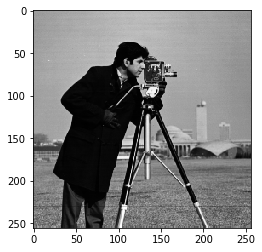

In [ ]:
import cv2
import matplotlib.pyplot as plt

im=cv2.imread('cameraman.tif',0)

print(im.shape)

plt.imshow(im,cmap='gray')
plt.show()

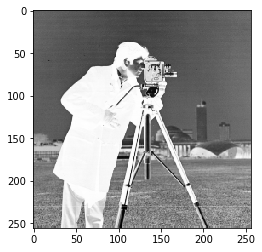

In [ ]:
imNeg=255-im
plt.imshow(imNeg,cmap='gray')
plt.show()

In [ ]:
im2=cv2.imread('rice.png',0)
print(im2.shape)


(256, 256)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


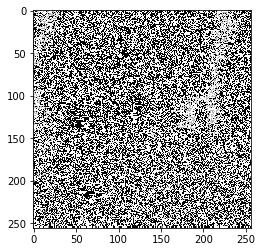

In [ ]:
result=(im**9)/im**8

plt.imshow(result,cmap='gray')
plt.show()

<function matplotlib.pyplot.show>

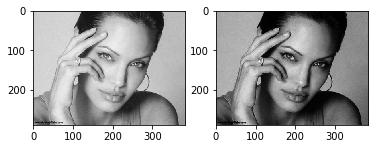

In [ ]:
im3=cv2.imread('contrast2.jpeg',0)
gamma=2.0

out=(1/255**(gamma-1))*(im3**gamma)
plt.subplot(1,2,1),plt.imshow(im3, cmap='gray')
plt.subplot(1,2,2),plt.imshow(out, cmap='gray')
plt.show



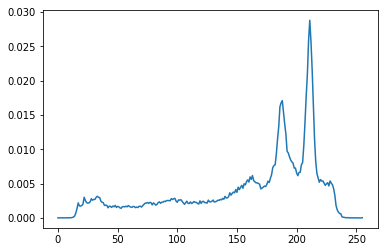

In [ ]:
def normalized_histogram(image):
  H=np.zeros((256))
  #Recorrer la imagen y acuular los colores
  for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
      H[image[i,j]]+=1
  H=H/(image.shape[0]*image.shape[1])
  return H

h=normalized_histogram(im3)
plt.plot(h)
plt.show()

In [ ]:
import numpy as np

In [ ]:
def equalize(image):
  h=normalized_histogram(image)
  
  A=np.zeros((256))
  A[0]=h[0]
  for i in range(1,256):
    A[i]=A[i-1]+h[i]
    #Recorrer la imagen y acualizar
    out=np.zeros(image.shape)
    for i in range (0,image.shape[0]):
      for j in range(0,image.shape[1]):
        out[i,j]=A[image[i,j]]
  return (255*out).astype('uint8')

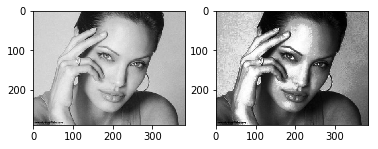

In [ ]:
out=equalize(im3)
plt.subplot(1,2,1),plt.imshow(im3,cmap='gray')
plt.subplot(1,2,2),plt.imshow(out,cmap='gray')
plt.show()

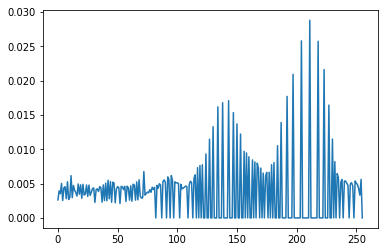

In [ ]:

h=normalized_histogram(equalize(im3))
plt.plot(h)
plt.show()